In [122]:
!/Users/Chris/anaconda3/bin/pip install seaborn

    100% |████████████████████████████████| 163kB 3.9MB/s 
  Running setup.py bdist_wheel for seaborn ... - \ done
  Stored in directory: /Users/Chris/Library/Caches/pip/wheels/83/56/50/6dc42e822bb1b1aad5e8f2927b1c932dc89ee4e0b15dac98c6
Successfully built seaborn


In [123]:
#Scientific Python imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn
######################################################

In [124]:
#Takes Yelp BRE (Business, Reviews, Elites) CSV file
#Returns dataframe of the CSV file 
def get_business_df(csvfile): 
    df = pd.read_csv(csvfile)
    return df

In [125]:
#Takes dataframe as input
#Returns dictionary with key as business id and value as
#indices of the rows in the df with that business id 
def convert_to_dic(df): 
    temp = df.groupby('business_id').groups
    return temp

In [126]:
#Function that takes the business id as input 
#Outputs the difference between before and after elite
def find_difference(business_id, df): 
    # Get index of first elite
    elite_status = []
    before_elite = []
    after_elite = []
    
    business = byBusiness_dic[business_id]
    for i in business:
        temp = df.at[i, 'elite_status']
        elite_status.append(temp)
    
    #Convert to numpy array
    elite_status = np.array(elite_status)
    first_elite_index = np.nonzero(elite_status == 1)[0][0]
    
    #Get ratings for before and after elite rating
    #Find averages for both arrays
    for i in range(0, len(business)): 
        if i <= first_elite_index:
            before_elite.append(df.at[business[i],'review_rating'])
        else:
            after_elite.append(df.at[business[i], 'review_rating'])
    
    before_elite_avg = np.mean(np.array(before_elite))
    after_elite_avg = np.mean(np.array(after_elite))
    absolute_difference = abs(after_elite_avg - before_elite_avg)
    
    return absolute_difference

In [127]:
#Finds the differences for all businesses
#Takes dictionary and dataframe as input
#Returns numpy array with differences
def difference_array(dataframe, df_dictionary): 
    diff_array = []
    for i in df_dictionary: 
        diff_array.append(find_difference(i, dataframe))
    #conversion to numpy array
    diff_array = np.array(diff_array)
    return diff_array

In [140]:
test_df = get_business_df('test100k.csv')
test_df.head()

,business_id,business_name,avg_rating,review_count,reviewer_id,review_rating,review_date,user_name,elite_status
0,-0Ackw6MF82PXO9f9Jh_Kg,Peepshow,3.5,234,DTZdGA6YzzKBvgt9FTI4KQ,4,2009-05-24,a,0
1,-0Ackw6MF82PXO9f9Jh_Kg,Peepshow,3.5,234,d4mK2rraUmL_20HKfPTrYA,3,2009-07-06,Stuart,0
2,-0Ackw6MF82PXO9f9Jh_Kg,Peepshow,3.5,234,vsR6VM-x-phiOsjU6QQEuA,4,2009-07-07,La,0
3,-0Ackw6MF82PXO9f9Jh_Kg,Peepshow,3.5,234,SyVS1ZskPHq728XwIZYpjQ,3,2009-07-13,Sonny,0
4,-0Ackw6MF82PXO9f9Jh_Kg,Peepshow,3.5,234,4V9G7UgwkNmso-X0Eyn9sA,2,2009-08-03,Nessreen,0


In [141]:
test_dic = convert_to_dic(test_df)
for i in test_dic:
    print(i)

0dORc6ckZw5HezR3BuSsqw
1Zj3JOukVxyU2kq4Vhju9A
2OY8xs4aqOt8eTnYokdrww
1MJ5xmHmeCiau07X2bQyUQ
2mcmuAvpNIJuV3gV0v9v2A
1dprSfGrxNxgYiuYcmb3FQ
1OA1jo0GlK9sf68f00w8ZQ
0vzZ_Bcb02rJljeMU9XkBw
21ZKuOC0o8vZglDeR41QLQ
4Iqcne2F4qY8lahrPA81rA
4jl0_Ny3wForCqs06DRzRg
1f0g466Geu4nDdJhYQ_Vhg
0tUlPATGNNR7zq5uzh3nog
1V1lodaiyYw4ZKyiv95pyw
2P_hn2-tMwx4ea7kljn8nQ
3AMFoTdFm7j2bocSpm7Xxw
2Igiyhi82R8_QaaPplRmCw
-6j-KVPPX2xKjCruNO2HnQ
3JTVc83KpA37yhrkwHzlvQ
4h8_u6Fqm3JvUEq8ctWf-A
0Y3VWMpXoRKbvy9mjQ7wdw
4rr-CJp0jMKr-kg9wnrTdw
49_IKHVVBDkcABcUiMm4rQ
25cCnPfbVdYWNhbFLuwiYQ
1bnte8O-rO_RcRlp9y2u7Q
4UVhuOLaMm2-34SrW8y-ag
0KNRmt72IWxI1JLpfpLwSA
0aV8mzabKSFylfi0NQGqlQ
1621ir5mjVgbHwxCbMAEjg
34uJtlPnKicSaX1V8_tu1A
1w6ii_Mb64da6cAxqxKF2A
3oLy0rlzRI_xiqfQHqC4_g
3Q0QQPnHcJuX1DLCL9G9Cg
1_siFXaQbxck3tiKRwnq7Q
0x4NXJFSQRRUNONxINTjWQ
3wLLf8wRqD1ZQowi9aZSoA
1Q1hrAxT2X3lgxDLBOLEQA
1zM7busmXUfYrbNiIHIcuw
0K634ehk41ZRc4kj3NTAEQ
0Rf3R61n9Ac45mS408n4Ww
1yx2zLskVTe5WQdYjL2Apw
0sktvP-VFkPXvqNHG889Bg
0dIChGWBs9ueUXl0hhkw2w
3UMcsN9Ijoe

In [139]:
differences = difference_array(test_df, test_dic)

In [133]:
print(differences)

[ 0.1984127   0.6635514   0.10714286  1.22302158  0.70866142  0.72387387
  0.          0.04718218]


In [110]:
np.mean(differences)

0.45898075087222218

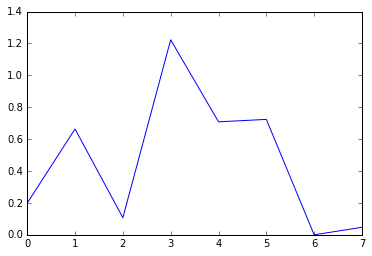

In [111]:
plt.plot(differences)

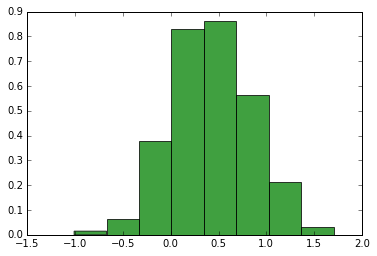

In [117]:
mu = np.mean(differences)
sigma = np.std(differences)
x = mu + sigma*np.random.randn(1000)
n, bins, patchs = plt.hist(x, differences.size, normed=1, facecolor='green', alpha=0.75)